# Influence of financial development on the broad money vs inflation correlation

In [2]:
import pandas as pd
import numpy as np

## Country / Country Code


In [3]:
fd_index = pd.read_csv("FD_IMF.csv",sep = ';')
country_code = fd_index[['code','country']].drop_duplicates()
country_code.head(50)

,code,country
0,ABW,Aruba
39,AGO,Angola
78,ALB,Albania
117,ARE,United Arab Emirates
156,ARG,Argentina
195,ARM,Armenia
234,ATG,Antigua and Barbuda
273,AUS,Australia
312,AUT,Austria
351,AZE,Azerbaijan


## Market Capitalization 
World Federation of Exchanges

In [4]:
market_cap = pd.read_csv("market_cap.csv",sep = ';') 
# Sum all exchanges markets from the same country
countries_cap = market_cap[['Country']+[str(year) for year in range(2000,2021)]].groupby("Country").sum()
# Get Country Code
countries_cap = pd.merge(countries_cap, country_code, how='outer', left_on = 'Country', right_on='country').iloc[:100]
flag = (countries_cap['country'].isna() == False) # Countries without IMF Data
# Exclude countries without IMF Data
countries_cap = countries_cap[flag]

In [5]:
countries_cap

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,code,country
0,91652.08,67595.30,34539.44,71788.88,82079.38,95959.75,118720.81,114140.89,79700.72,91489.86,...,53104.79,60142.04,56134.63,63882.47,108740.05,45986.05,39393.54,0.00,ARG,Argentina
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,47.81,54.96,26.95,ARM,Armenia
2,372794.35,375130.79,380087.00,585529.69,776402.76,804014.82,1095857.96,1298315.04,683871.56,1261909.34,...,1365958.13,1288754.62,1187203.06,1316930.79,1508565.21,1262800.27,1487598.50,1720556.18,AUS,Australia
3,29935.22,25204.35,33578.12,56522.45,87776.27,126251.47,192770.31,236448.39,76288.70,114076.07,...,117671.40,96790.33,96079.38,100317.10,150645.99,116802.00,133098.22,132083.25,AUT,Austria
4,6624.35,6599.50,0.00,9626.79,13540.85,17364.82,21122.39,27088.35,19947.35,16262.63,...,18627.48,22067.53,19251.07,19369.32,21706.18,21862.75,26882.28,24608.09,BHR,Bahrain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2576991.34,2149500.80,1785199.55,2425822.00,2815928.03,3058182.42,3781358.50,3846461.88,1868152.97,6250066.44,...,8375860.05,7583775.75,3878774.25,3467434.00,4455408.11,3637996.04,4182873.43,4045597.13,GBR,United Kingdom
96,15108006.08,13984120.10,11054695.84,14266493.00,16323910.63,17001401.81,19570452.24,19922279.82,11590277.78,15077285.74,...,24034853.52,26330589.19,25067539.60,45667930.72,32120702.65,30436313.05,37482228.13,45293112.31,USA,United States
97,8100.00,6215.80,3979.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,VEN,"Venezuela, RB"
98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9480.74,26525.89,...,40061.27,52426.69,58734.03,73906.79,126502.07,132653.00,149817.28,186008.53,VNM,Vietnam


## Financial Development Index
International Monetary Fund


In [6]:
fd_index = pd.read_csv("FD_IMF.csv",sep = ';') 

In [7]:
fd_index = fd_index[fd_index['year'] >= 2000].groupby('country').mean().drop(['ifs','year'],axis=1)

In [8]:
fd_index

,FD,FI,FM,FID,FIA,FIE,FMD,FMA,FME
country,,,,,,,,,
AM,0.640526,0.716316,0.540000,0.605263,0.670526,0.714211,0.558947,0.523684,0.524737
Africa,0.136842,0.230526,0.038421,0.114737,0.098947,0.510526,0.056316,0.034737,0.021053
Albania,0.174737,0.335789,0.002632,0.085789,0.303684,0.631053,0.012105,0.000000,0.000000
Algeria,0.138421,0.269474,0.004737,0.052105,0.081579,0.753684,0.007368,0.000000,0.000000
All countries,0.309474,0.400526,0.202632,0.244737,0.327368,0.600526,0.208421,0.202105,0.192105
...,...,...,...,...,...,...,...,...,...
"Venezuela, RB",0.205789,0.332632,0.071053,0.113684,0.323684,0.554737,0.141579,0.006842,0.055263
Vietnam,0.383158,0.340000,0.412105,0.217368,0.091053,0.754737,0.157895,0.384737,0.730526
Western Hemisphere,0.297368,0.437368,0.147895,0.282632,0.394737,0.580000,0.160526,0.168421,0.104737


## Inflation
International Monetary Fund

In [9]:
price_index = pd.read_csv("price_index_IMF.csv",sep = ';') 

In [10]:
price_index = price_index[price_index['Attribute'] == 'Value'][['Country Name']+[str(year) for year in range(2000,2021)]]

In [11]:
price_index_clean = price_index.dropna()
price_index_clean = price_index_clean.set_index('Country Name')
price_index_clean = price_index_clean.astype(float)
price_index_clean

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Norway,75.450000,77.716667,78.716667,80.675000,81.041667,82.283333,84.200000,84.800000,87.983333,89.916667,...,93.275000,93.925000,95.916667,97.875000,100.000000,103.550000,105.491667,108.408333,110.758333,112.183333
Brazil,1636.098333,1748.013333,1895.723333,2174.677500,2318.145000,2477.390833,2581.034167,2675.016667,2826.920000,2965.100833,...,3321.196667,3500.657500,3717.849167,3953.153333,4310.119167,4686.786667,4848.310833,5025.994167,5213.613333,5381.062500
Switzerland,94.035275,94.965300,95.575650,96.185708,96.957967,98.094267,99.133600,99.859592,102.282233,101.790800,...,102.728458,102.017017,101.795325,101.781858,100.617575,100.180283,100.715042,101.658050,102.026983,101.286375
Russian Federation,30.759554,37.365786,43.265369,49.176843,54.531521,61.449010,67.390303,73.460348,83.826167,93.589677,...,108.440467,113.943542,121.638958,131.155275,151.529467,162.200850,168.175242,173.015825,180.750267,186.862625
Lithuania,69.133150,70.078283,70.275558,69.478417,70.287217,72.155792,74.853783,79.148275,87.795925,91.705517,...,96.752967,99.742617,100.787400,100.891975,99.999992,100.905517,104.662117,107.485825,109.995092,111.314917
Latvia,55.021531,56.389938,57.483269,59.174799,62.839131,67.079798,71.464268,78.677140,90.795244,94.004045,...,97.048547,99.239699,99.210468,99.826060,99.999999,100.140632,103.075117,105.687508,108.658817,108.896850
France,79.929167,81.235833,82.798333,84.535833,86.346667,87.854167,89.325833,90.655000,93.205000,93.286667,...,96.715000,98.605000,99.456667,99.961667,99.999167,100.182500,101.216667,103.090000,104.232500,104.729167
Canada,95.375000,97.783333,99.991667,102.750000,104.658333,106.975000,109.116667,111.450000,114.091667,114.433333,...,119.858333,121.675000,122.816667,125.158333,126.566667,128.375000,130.425000,133.383333,135.983333,136.958333
Turkey,36.741170,56.728436,82.235878,100.000833,108.599167,117.481667,128.756667,140.030833,154.655833,164.323333,...,189.945833,206.835000,222.333333,242.020000,260.585000,280.845833,312.144167,363.125000,418.235833,469.590833


In [12]:
inflation = (price_index_clean - price_index_clean.shift(1,axis=1))/price_index_clean.shift(1,axis=1)
inflation

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Norway,NaN,0.030042,0.012867,0.024878,0.004545,0.015321,0.023293,0.007126,0.037539,2.197386e-02,...,0.012850,0.006969,0.021205,0.020417,0.021711,0.035500,0.018751,0.027648,0.021677,0.012866
Brazil,NaN,0.068404,0.084502,0.147149,0.065972,0.068695,0.041836,0.036413,0.056786,4.888035e-02,...,0.066364,0.054035,0.062043,0.063290,0.090299,0.087391,0.034464,0.036649,0.037330,0.032118
Switzerland,NaN,0.009890,0.006427,0.006383,0.008029,0.011720,0.010595,0.007323,0.024260,-4.804679e-03,...,0.002313,-0.006925,-0.002173,-0.000132,-0.011439,-0.004346,0.005338,0.009363,0.003629,-0.007259
Russian Federation,NaN,0.214770,0.157887,0.136633,0.108886,0.126853,0.096687,0.090073,0.141108,1.164733e-01,...,0.084405,0.050747,0.067537,0.078234,0.155344,0.070424,0.036833,0.028783,0.044704,0.033817
Lithuania,NaN,0.013671,0.002815,-0.011343,0.011641,0.026585,0.037391,0.057372,0.109259,4.453045e-02,...,0.041303,0.030900,0.010475,0.001038,-0.008841,0.009055,0.037229,0.026979,0.023345,0.011999
Latvia,NaN,0.024870,0.019389,0.029426,0.061924,0.067485,0.065362,0.100930,0.154023,3.534107e-02,...,0.043707,0.022578,-0.000295,0.006205,0.001742,0.001406,0.029304,0.025345,0.028114,0.002191
France,NaN,0.016348,0.019234,0.020985,0.021421,0.017459,0.016751,0.014880,0.028129,8.762048e-04,...,0.021116,0.019542,0.008637,0.005078,0.000375,0.001833,0.010323,0.018508,0.011083,0.004765
Canada,NaN,0.025251,0.022584,0.027586,0.018573,0.022136,0.020020,0.021384,0.023703,2.994668e-03,...,0.029121,0.015157,0.009383,0.019066,0.011252,0.014288,0.015969,0.022682,0.019493,0.007170
Turkey,NaN,0.544002,0.449641,0.216024,0.085983,0.081792,0.095972,0.087562,0.104441,6.250977e-02,...,0.064719,0.088916,0.074931,0.088546,0.076709,0.077751,0.111443,0.163325,0.151768,0.122790


## Monetary Aggregates
OCDE (M1 & M3) + World Bank (M3)

In [41]:
M1_ocde_raw = pd.read_csv("M1_OCDE.csv",sep = ';')
M3_ocde_raw = pd.read_csv("M3_OCDE.csv",sep = ';')

M1_ocde_dict = {country:{year:np.nan for year in range(2000,2020)} for country in M1_ocde_raw.LOCATION.unique()}
M3_ocde_dict = {country:{year:np.nan for year in range(2000,2020)} for country in M3_ocde_raw.LOCATION.unique()}

for index, row in M1_ocde_raw.iterrows():
    M1_ocde_dict[row['LOCATION']][row['TIME']] = row['Value']

for index, row in M3_ocde_raw.iterrows():
    M3_ocde_dict[row['LOCATION']][row['TIME']] = row['Value']


M1_ocde = pd.DataFrame.from_dict(M1_ocde_dict)
M1_ocde.index = pd.to_datetime(M1_ocde.index, format='%Y')
M3_ocde = pd.DataFrame.from_dict(M3_ocde_dict)
M3_ocde.index = pd.to_datetime(M1_ocde.index, format='%Y')

In [42]:
M1_ocde

,AUS,CAN,CZE,DNK,HUN,ISL,JPN,KOR,MEX,NZL,...,COL,CRI,IND,IDN,ISR,RUS,ZAF,OECD,OECDE,EA19
2000-01-01,18.76786,29.28147,20.24264,38.01241,20.53272,16.33402,46.71507,28.33863,15.96037,34.98002,...,13.94206,NaN,14.89199,13.25959,9.747102,4.556386,19.85736,28.53280,16.89676,31.76884
2001-01-01,21.59654,32.19206,22.77059,39.04982,23.18316,16.42490,50.69358,33.51904,18.31561,40.14391,...,15.70789,NaN,16.55491,15.97713,11.093320,6.924253,21.76143,31.07184,19.86309,34.03704
2002-01-01,28.34892,35.36032,26.15493,41.73394,27.43054,17.90695,64.63502,41.46779,21.76995,45.63920,...,18.86261,14.37509,18.46166,17.55188,12.872630,9.329021,25.93628,35.05837,22.72057,36.66444
2003-01-01,32.18549,36.72045,30.58028,45.07611,31.98979,21.87142,69.84149,44.16972,24.35896,49.60818,...,21.88685,17.35774,21.01543,19.68133,12.918790,13.088390,26.47052,38.24948,26.31899,40.59911
2004-01-01,34.84903,39.72519,34.36931,48.98291,33.85900,28.61759,72.74577,47.66790,27.76016,53.77688,...,25.16684,22.59781,24.76314,22.44134,15.184700,18.654890,30.54467,41.53373,30.84160,44.41516
2005-01-01,38.08964,42.26330,37.16971,57.59829,38.78947,37.36483,76.13275,52.07750,30.83130,56.66005,...,29.82516,28.22389,28.92486,25.71301,17.794000,24.232890,34.90224,44.17343,35.37089,50.41000
2006-01-01,42.13522,45.79271,42.87322,65.30829,47.33622,45.79369,78.38445,52.26459,35.62698,59.89638,...,35.99417,33.93626,35.09486,30.08963,20.338710,32.589630,42.08773,46.68903,41.31850,56.12431
2007-01-01,47.79257,49.89303,49.12443,71.47885,50.32715,70.72143,78.32439,49.17722,39.10836,62.51409,...,40.91986,43.30312,40.60561,37.11485,23.398620,44.784580,50.47680,48.34607,45.89328,59.88838
2008-01-01,51.46949,54.16786,54.49995,75.54026,54.23833,105.14730,77.92685,48.48430,42.26750,65.33812,...,44.23141,56.37460,47.54676,43.83781,26.733790,55.106400,56.62848,51.09713,51.34062,61.39625
2009-01-01,59.50946,60.81124,58.73868,76.29906,52.25383,122.09360,78.32919,56.37249,47.74484,67.31902,...,48.56758,59.60394,53.92194,46.94918,39.902310,51.848250,57.29804,56.81594,55.53020,67.67278


In [45]:
M1_ocde.columns

Index(['AUS', 'CAN', 'CZE', 'DNK', 'HUN', 'ISL', 'JPN', 'KOR', 'MEX', 'NZL',
       'NOR', 'POL', 'SWE', 'CHE', 'TUR', 'GBR', 'USA', 'BRA', 'CHL', 'CHN',
       'COL', 'CRI', 'IND', 'IDN', 'ISR', 'RUS', 'ZAF', 'OECD', 'OECDE',
       'EA19'],
      dtype='object')

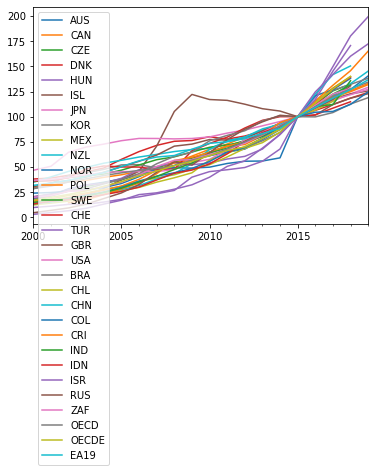

In [46]:
M1_ocde.plot()